In [122]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [123]:
header=['Frequency',' Angle of attack','Chord length','Free-stream velocity','Suction side displacement thickness','Scaled_sound_pressure_level']
df=pd.read_csv('airfoil_self_noise.dat',sep='\t',names=header)
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [124]:
df.describe()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled_sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [125]:
df.isnull().values.sum()


0

In [126]:
# normalizing data

nor_data=(df-df.min())/(df.max()-df.min())
corr_data=nor_data.corr()
corr_data.head()


,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled_sound_pressure_level
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle of attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Free-stream velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Suction side displacement thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670


<AxesSubplot:>

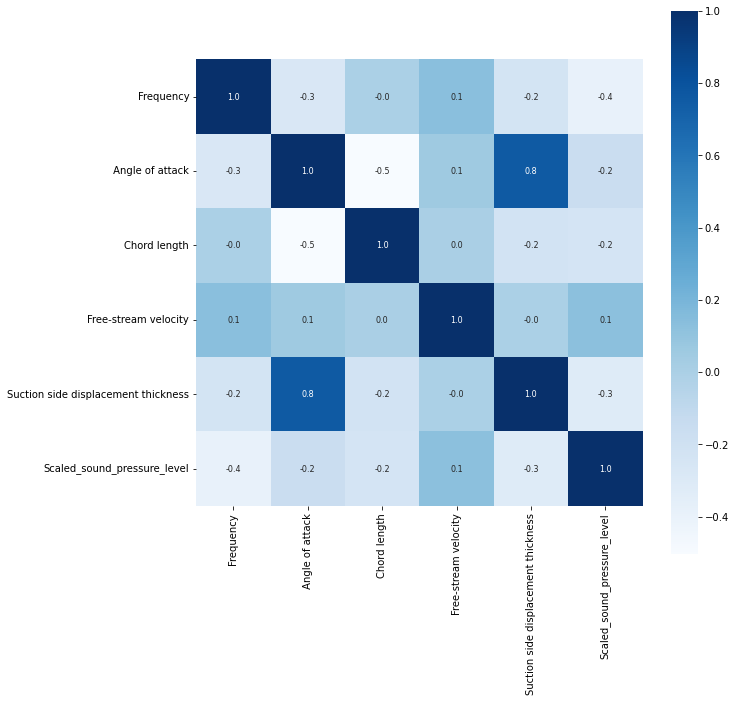

In [127]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

In [128]:
X=nor_data.drop(['Scaled_sound_pressure_level'],axis=1)
Y=nor_data['Scaled_sound_pressure_level']
X

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
0,0.030303,0.000000,1.000000,1.000000,0.039005
1,0.040404,0.000000,1.000000,1.000000,0.039005
2,0.053030,0.000000,1.000000,1.000000,0.039005
3,0.070707,0.000000,1.000000,1.000000,0.039005
4,0.090909,0.000000,1.000000,1.000000,0.039005
5,0.116162,0.000000,1.000000,1.000000,0.039005
6,0.148990,0.000000,1.000000,1.000000,0.039005
7,0.191919,0.000000,1.000000,1.000000,0.039005
8,0.242424,0.000000,1.000000,1.000000,0.039005
9,0.308081,0.000000,1.000000,1.000000,0.039005


In [129]:
#split data for x-axis and y-axis
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=45)
print(X.shape,x_train.shape,x_test.shape)

(1503, 5) (1202, 5) (301, 5)


In [130]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [131]:
prediction=model.predict(x_test)
print(prediction)

[0.64470294 0.44033353 0.55758972 0.36885154 0.4684252  0.55729245
 0.79933528 0.46615798 0.52036964 0.51181869 0.69674405 0.55378462
 0.56925808 0.12803515 0.68238716 0.46667728 0.76609173 0.51954569
 0.40816721 0.57229761 0.55355616 0.57624434 0.7942997  0.62049902
 0.6012572  0.71701252 0.68135966 0.36267048 0.65305988 0.62907776
 0.01261069 0.58956689 0.69771666 0.52535758 0.57544976 0.7533965
 0.30377875 0.70202142 0.58026238 0.34899569 0.60638547 0.57024731
 0.56296892 0.51174527 0.66053312 0.53978915 0.61250331 0.61720594
 0.44212249 0.76787982 0.42084777 0.54592213 0.66011952 0.4974108
 0.7908637  0.64768571 0.51320705 0.53834884 0.59045002 0.34473368
 0.58734394 0.60122343 0.35092851 0.63826454 0.56993615 0.62860723
 0.46980308 0.53817815 0.58557118 0.20365686 0.69173709 0.72152503
 0.5677957  0.71041907 0.53702714 0.62114539 0.74312023 0.70544017
 0.6117265  0.77949556 0.58323857 0.28548333 0.40194457 0.4306017
 0.36433828 0.53224723 0.71946762 0.56713918 0.64329213 0.7878426

In [132]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 0.10380176150856456
Mean Squared Error: 0.01796610539242077
Root Mean Squared Error: 0.1340377013844268
